In [202]:
#IMPORT LIBRAIRIES
##OS
import time
from sqlalchemy import create_engine
##Dieu
import pandas as pd
##Calculation
import numpy as np
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn import svm
# #Graph
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#Dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [203]:
# Function
start_time = time.time()
def importdata(x, link, table):
    
    print("Reading data..")
    col = x.split()
    start_time = time.time()
    df = pd.read_csv(link, encoding="UTF-8")
    df.columns = col
    print("Done.")
    df.to_sql(table, con = engine, if_exists='append', index=False)
    return print("-- Loading time : %s secondes. --" % (time.time() - start_time))

# Brief Régression Logistique
La régression logistique consiste à prédire des variables binaires et non à prédire des variables continues.

## 1. Réaliser une veille sur la régression logistique (vous pouvez vous aider du tutoriel)

## [My benchmarking SGBDR](https://github.com/ejhb/audit/blob/master/2020/11-november/16-linear/audit/introduction_r%C3%A9gression_logistique.pdf)

In [204]:
df = pd.read_csv('./data/csvclientel.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 2. Récupérer les données CSV

In [205]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## 3. Après avoir analysé et pré-traité les données, charger celles-ci dans une base de données relationnelle MySQL (Python, Pandas).

In [206]:
df2 = pd.read_csv('./data/csvclientel.csv')
df2['Gender_Bool'] = df2['Gender'].replace({'Male':0, 'Female':1})
df2.to_csv('./data/csvclientel2.csv',index=False)
df2

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Bool
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1
396,15706071,Male,51,23000,1,0
397,15654296,Female,50,20000,1,1
398,15755018,Male,36,33000,0,0


## 4. Utiliser un jupyter-notebook pour le travail qui suit.

#### CREATION DATABASE
```
CREATE DATABASE apple;
USE netflix_db;
```
FOR LOADING DATA :

-- This settings must be on

-- show global variables like 'local_infile';

-- set global local_infile=true;

-- SET GLOBAL local_infile = 1;

-- Then to load file you must connect with :
```
sudo mysql --local-infile=1 -u root
``` 
CREATION TABLE
```
DROP TABLE IF EXISTS client;
CREATE TABLE client(
`User ID` INT  PRIMARY KEY NOT NULL
,Gender VARCHAR(10)
,Age INT NOT NULL
,EstimatedSalary INT NOT NULL
,Purchased BOOLEAN NOT NULL
,Gender_Bool BOOLEAN NOT NULL
)
; 
```

#### LOADING
```
LOAD DATA LOCAL INFILE '/home/joshua/Documents/git-workspace/audit/2020/11-november/16-linear/data/csvclientel2.csv'
INTO TABLE client
FIELDS TERMINATED BY ',' 
IGNORE 1 LINES;
```

In [207]:
engine = create_engine("mysql+pymysql://root@localhost/apple")
df = pd.read_sql_table('client',engine)

## 5. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.

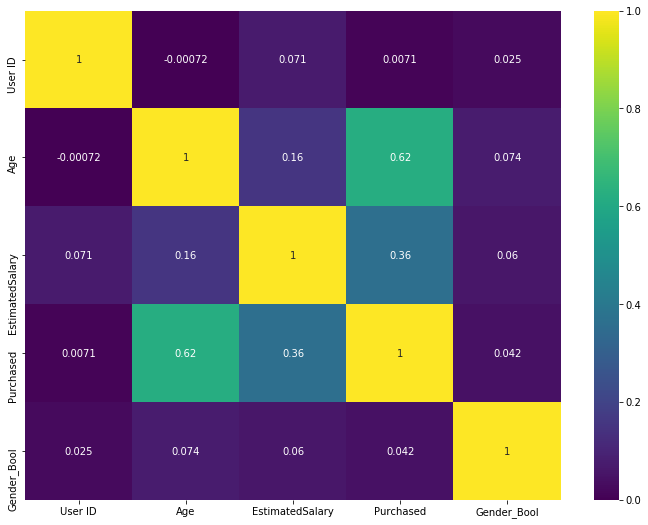

In [208]:
df.to_numpy()
fig_dims = (12,9)
fig , ax =plt.subplots(figsize = fig_dims)
sns.heatmap(df.corr(), annot=True, cbar = True, cmap ='viridis')

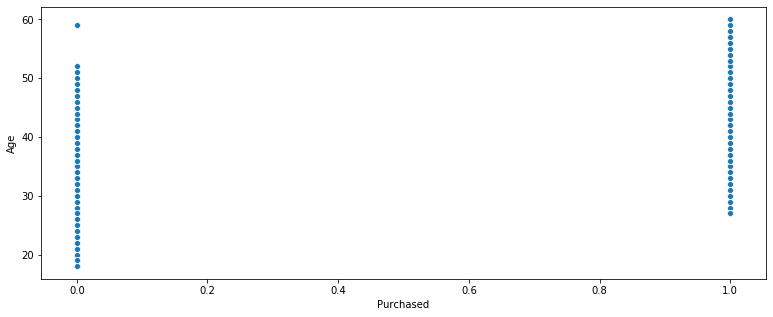

In [209]:
x = df['Purchased']
y = df['Age']

fig_dims = (13,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.scatterplot(x=x,y=y,ax=ax)

In [210]:
X = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values

#3 Splitting the dataset into the Training set and Test set
#Totally 400 rows of data and 300 for training set and 100 for test #set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [211]:
#4 Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#It does not need to scale y_train because it contains categorical #data 

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
# Faire de nouvelles prédictions
y_pred = logreg.predict(X_test)
y_pred

Training set score: 0.830
Test set score: 0.880


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [212]:
#5 Fitting the Logistic Regression to the Training Set: 
#There are many optional parameters. Lets only use random_state=0
# #We create a classifier object of LR class
classifier= LogisticRegression(random_state=0)
# #Fit logistic regression model to the training set (X_train and #y_train)
classifier.fit(X_train, y_train)
# #6 Predicting the Test set results
# #Using predict method for the classifier object and put X_test for #argument
y_pred = classifier.predict(X_test)

In [213]:
#7 Making the Confusion Matrix. It contains the correct and #incorrect predictions of our model 
#import confusion_matrix function from sklearn.metrics library
#y_true parameter will be y_test
#y_pred is the logistic regression model prediction
cm=confusion_matrix(y_test, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


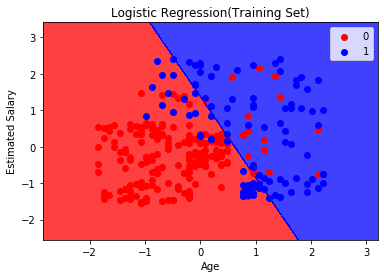

In [221]:
#8 Visualizing the Training Set results: 
#ListedColormap class help us to colorize the data points.
#Create local variables X_set and y_set. Because we use these variables again in the test set

X_set, y_set= X_train, y_train
#Create the grid. step=0.01 means all the pixels were actually with #a 0.01 resolution. min and max of the 
#X_Set use with minus ana plus one to prevent ponits to be squeezed #on the axes.
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01), np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
#This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
#points and the blue pixel points. contour function make the contour #between red and blue regions.
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap = ListedColormap(('red','blue')))
#plot the limits of the age and the estimated salary lines.
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
#This loop here plots all the data points that are the real values.
 
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)
#Add the name of the plot and the labels.

plt.figure(1, figsize=(12, 5))
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [215]:
## 8. Rendre accessible votre notebook via Github.